### Исследование и приоритезация гипотез для увеличения выручки комапнии. А/В тест.

**ОПИСАНИЕ ПРОЕКТА**

В нашем распоряжении данные о 9 гипотезах для увеличения выручки, подготовленных отделом маркетинга интернет-магазина.

**Цель:**: Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.
  
**Часть 1. Приоритизация гипотез**

**Какие гипотезы наиболее важны для проверки, какие из них мы будем проверять в первую очередь?**

В файле **/datasets/hypothesis.csv** 9 гипотез по увеличению выручки интернет-магазина спараметрами: **Reach, Impact, Confidence, Effort.**

**Задача:**
- Применить фреймворк ICE для приоритезации гипотез. Отсортировать их по убыванию приоритета.
- Применить фреймворк RICE для приоритезации гипотез. Отсортировать их по убыванию приоритета.
- Пояснить, как изменилась приоритезация гипотез при применении RICE вместо ICE. Дать пояснения, почему так произошло.

**Часть 2. Анализ A/B-теста** 

**Есть ли отличия между группами A и B? Есть ли смысл продолжать тестирование?**

Мы провели A/B-тест и получили результаты, которые описаны в файлах **/datasets/orders.csv и /datasets/visitors.csv.**

**Задача: Проанализировать A/B-тест, сделать выводы и предположения:**
- Построим график кумулятивной выручки по группам. 
- Построим график кумулятивного среднего чека по группам. 
- Построим график относительного изменения кумулятивного среднего чека группы B к группе A. 
- Построим график кумулятивного среднего количества заказов на посетителя по группам. 
- Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. 
- Построим точечный график количества заказов по пользователям. 
- Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.
- Построим точечный график стоимостей заказов.
- Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.
- Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. 
- Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 
- Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. 
- Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

**Примем решение по результатам теста и дадаим пояснения.** 
  
  *Варианты решений:* 
1. Остановить тест, зафиксировать победу одной из групп. 
2. Остановить тест, зафиксировать отсутствие различий между группами. 
3. Продолжить тест.

<span style="color:green">**Описание данных**</span> 

В нашем распоряжении три датасета: 
- Для 1-ой Части проекта:
  - **'/datasets/hypothesis.csv'**
- Для 2-ой Части проекта:  
  - **'/datasets/orders.csv'**     
  - **'/datasets/visitors.csv'** 

**Структура '/datasets/hypothesis.csv':**
- **Hypothesis** — краткое описание гипотезы;
- **Reach** — охват пользователей по 10-балльной шкале;
- **Impact** — влияние на пользователей по 10-балльной шкале;
- **Confidence** — уверенность в гипотезе по 10-балльной шкале;
- **Efforts** — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

**Структура '/datasets/orders.csv':**
- **transactionId** — идентификатор заказа;
- **visitorId** — идентификатор пользователя, совершившего заказ;
- **date** — дата, когда был совершён заказ;
- **revenue** — выручка заказа;
- **group** — группа A/B-теста, в которую попал заказ.

**Структура '/datasets/visitors.csv':**
- **date** — дата;
- **group** — группа A/B-теста;
- **visitors** — количество пользователей в указанную дату в указанной группе A/B-теста.

In [1]:
# импортируем все нужные для работы библиотеки 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns
from collections import Counter
from scipy import stats as st
import datetime as dt
import warnings
from IPython.display import display_html
pd.set_option('display.max_columns', 30)
pd.set_option("display.float_format", "{:.2f}".format)
pd.set_option('display.max_colwidth', 500)
warnings.simplefilter('ignore')

In [2]:
# пропишем пути к датафрейму 
try:
    hypothesis= pd.read_csv('hypothesis.csv')
    orders= pd.read_csv('orders.csv', sep= ',' )
    visitors= pd.read_csv('visitors.csv', sep= ',')

except FileNotFoundError:
    hypothesis= pd.read_csv('/datasets/hypothesis.csv')
    orders= pd.read_csv('/datasets/orders.csv', sep= ',' )
    visitors= pd.read_csv('/datasets/visitors.csv', sep= ',')   
    print("Ошибка открытия")

Ошибка открытия


### Часть 1. Приоритизация гипотез.

In [3]:
# посмотрим на информацию в таблицах, оценим количество, природу пропусков, посмотрим, есть ли дубликаты
for i in [hypothesis, orders, visitors]:
    display(i.head(10))
    display(i.describe())
    display(i.info())
    print(i.duplicated().sum())

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


,Reach,Impact,Confidence,Efforts
count,9.00,9.00,9.00,9.00
mean,4.78,4.78,5.56,4.89
std,3.15,3.19,3.05,2.80
min,1.00,1.00,1.00,1.00
25%,3.00,3.00,3.00,3.00
50%,3.00,3.00,7.00,5.00
75%,8.00,7.00,8.00,6.00
max,10.00,10.00,9.00,10.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

0


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


,transactionId,visitorId,revenue
count,1197.00,1197.00,1197.00
mean,2155621385.53,2165960143.10,8348.01
std,1229084904.76,1236014192.15,39191.13
min,1062393.00,5114589.00,50.00
25%,1166775572.00,1111826046.00,1220.00
50%,2145193898.00,2217984702.00,2978.00
75%,3237740112.00,3177606451.00,8290.00
max,4293855558.00,4283872382.00,1294500.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

0


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


,visitors
count,62.00
mean,607.29
std,114.40
min,361.00
25%,534.00
50%,624.50
75%,710.50
max,770.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

0


**Вывод:** Пропуски и дубликаты отсутствуют.

In [4]:
# заменим все названия столбцов на строчные, приведем к "snake case"
hypothesis.columns= map(str.lower, hypothesis.columns)

In [5]:
# проверим 
hypothesis.columns.to_list()

['hypothesis', 'reach', 'impact', 'confidence', 'efforts']

In [6]:
# сразу преобразуем данные о времени
orders['date']= pd.to_datetime(orders['date']).dt.date
visitors['date']= pd.to_datetime(visitors['date']).dt.date

**Вывод:** 
- Привели названия столбцов в соответсвие с "snake case", 
- Преобразовали данные о времени, 
- Дубликаты и пропуски не выявлены.

Данные к анализу подготовлены.

<span style="color:brown">Применим фреймворк ICE для приоритезации гипотез. Отсортируем их по убыванию приоритета.</span>

In [7]:
# посчитаем ICE для гипотез
hypothesis['ICE']= hypothesis['impact'] * hypothesis['confidence']/ hypothesis['efforts']
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False).round(2)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


**Вывод:** Лидирующую позицию в рейтинге гипотез заняла гипотеза: "Запустить акцию, дающую скидку на товар в день рождения".

<span style="color:brown">Применим фреймворк ICE для приоритезации гипотез. Отсортируем их по убыванию приоритета.</span>

In [8]:
# посчитаем RICE для гипотез
hypothesis['RICE']= hypothesis['reach']*hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']
hypothesis[['hypothesis', 'RICE']].sort_values(by= 'RICE', ascending= False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.00


**Вывод:** Лидирующую позицию в рейтинге гипотез заняла гипотеза: "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок	".

<span style="color:brown">Приоритезация гипотез при применении RICE вместо ICE изменилась. Почему так произошло?</span>

In [9]:
# визуализируем изменение порядка гипотез
t_ICE= hypothesis[['hypothesis', 'ICE']].sort_values(by= 'ICE').reset_index(drop= True).reset_index().drop('ICE', axis= 1)
t_RICE= hypothesis[['hypothesis', 'RICE']].sort_values(by= 'RICE').reset_index(drop= True).reset_index().drop('RICE', axis= 1)
t_all= t_ICE.merge(t_RICE, on= 'hypothesis')
t_all= t_all.set_axis(['ICE', 'hypothesis', 'RICE'], axis= 1)

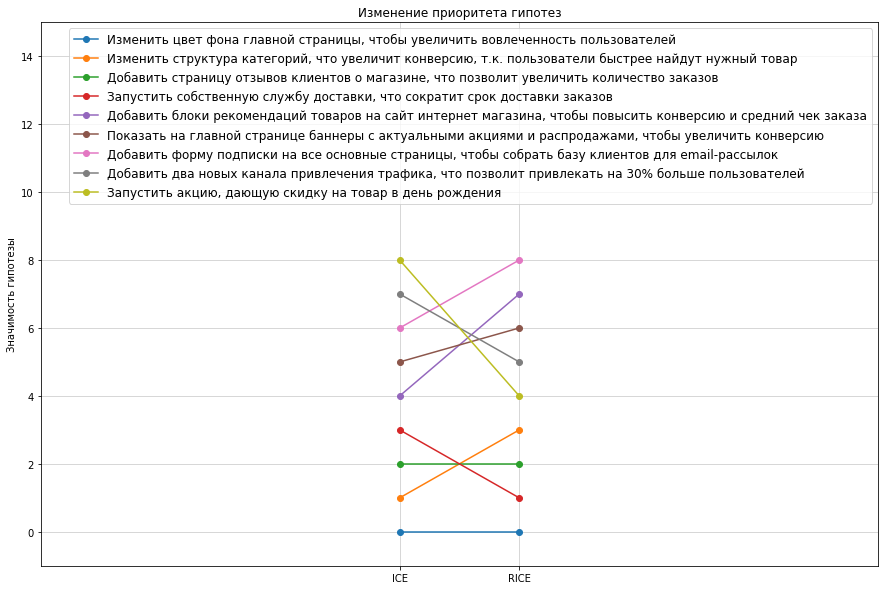

In [10]:
fig, ax= plt.subplots(figsize= (15, 10))

for i in hypothesis.index:
    ax.plot(t_all.iloc[i, [0, 2]], marker='o', label= f'{t_all.iloc[i, 1]}')
plt.ylabel('Значимость гипотезы')
plt.ylim(-1, 15)
plt.xlim(-3, 4)
plt.grid(linestyle='-', linewidth=0.5)
plt.legend(loc='upper right', fontsize='large')
plt.title('Изменение приоритета гипотез')
plt.show()

**Вывод:** 

Топ- 5 в обех рейтингах одинаков. Это Гипотезы 0,2,6,7 и 8. Изменилась приоритезация:
- **По фреймворку ICE** наиболее приоритетными стали гипотезы:
  - Запустить акцию, дающую скидку на товар в день рождения(**8**)
  - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей(**0**)
  - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок(**7**)
  - Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию(**6**)
  - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа(**2**)	
- **По фреймворку RICE** наиболее приоритетные стали гипотезы:
  - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок(**7**)
  - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа(**2**)
  - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей(**0**)
  - Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию(**6**)	
  - Запустить акцию, дающую скидку на товар в день рождения **(8)**	
  
Причина изменения в том, что фреймворк **RICE** учитывает важный параметр **Reach:** (скольких пользователей затронет изменение, которое вы хотите внести). Поэтому лидерами стали гипотезы с наибольшим охватом пользователей. 

Решение: Надо предложить для тестирования **гипотезу №7**. А также можно рассмотреть и **2-ую гипотезу.**

### **Часть 2. Анализ A/B-теста** 

Мы провели A/B-тест и получили результаты, которые описаны в файлах **/datasets/orders.csv и /datasets/visitors.csv.**

In [11]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [12]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [13]:
# проверим, есть ли пользователи, которые попали в обе группы
double= orders.groupby(['visitorId']).agg({'group' : 'nunique', 'transactionId' : 'count', 'revenue' : 'sum'}).reset_index()
print(f'Пользователей, попавших в обе группы: {double[double.group != 1]["visitorId"].count()}')
print(f"Сумма заказов этих пользователей {double[double.group != 1]['revenue'].sum()}")
print(f"Количество их заказов {double[double.group != 1]['transactionId'].sum()}")

Пользователей, попавших в обе группы: 58
Сумма заказов этих пользователей 1558935
Количество их заказов 181


58 пользователей от всей выборки - это 5%, можно было бы и удалить, но многовато. Если посчитать средний чек, то около 8600, и, вроде сумма адекватная. Но мы не знаем точно, нормальное ли распределение, мы имеем только пользователей, которые совершили хотя бы один платеж, а пользователти, котрые не платили, нам не известны. Может быть, как раз в этих группах есть интересные для нас маркеры. Оставим, не будем удалять. Поработаем с выбросами и аномалиями чуть позже, когда дойдем до перцентилей.

В датасэте **orders** мы можем посмотреть на таких "двойников", их там, как мы выяснили 58. Возьмем пользователя с Id 199603092, он сразу в двух группах: А и В.

In [14]:
orders[orders['visitorId'] == 199603092]

,transactionId,visitorId,date,revenue,group
26,2223239646,199603092,2019-08-15,3488,A
134,62794304,199603092,2019-08-22,6976,A
246,437656952,199603092,2019-08-02,3488,B
823,2971973105,199603092,2019-08-27,2790,A
1102,1941707234,199603092,2019-08-12,6438,A


In [15]:
# проверим, есть ли пересечения в заказах
len(np.intersect1d(orders[orders['group'] == 'A']['transactionId'], orders[orders['group'] == 'B']['transactionId']))

0

**Вывод:** А вот в заказах пересечений нет.

<span style="color:brown">Построим график кумулятивной выручки по группам.</span>

In [16]:
# cоздадим массив уникальных пар значений дат и групп теста
datesGroups= orders[['date','group']].drop_duplicates()

# получим агрегированные кумулятивные по дням данные о заказах 
ordersAggregated= datesGroups.apply(lambda x: orders[np.logical_and(orders['date']<= x['date'], orders['group']== x['group'])]. \
                               agg({'date' : 'max', 
                                    'group' : 'max', 
                                    'transactionId' : pd.Series.nunique, 
                                    'visitorId' : pd.Series.nunique, 
                                    'revenue' : 'sum'}), axis= 1).sort_values(by= ['date','group'])

# получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated= datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date']<= x['date'], visitors['group']== x['group'])]. \
                               agg({'date' : 'max', 
                                    'group' : 'max', 
                                    'visitors' : 'sum'}), axis=1).sort_values(by= ['date','group'])

# объединим кумулятивные данные в одной таблице и присвоим ее столбцам понятные названия
cumulativeData= ordersAggregated.merge(visitorsAggregated, left_on= ['date', 'group'], right_on= ['date', 'group'])

# переименуем столбцы
cumulativeData.columns= ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


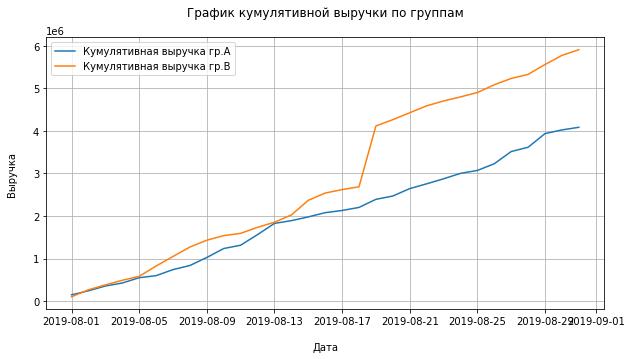

In [17]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA= cumulativeData[cumulativeData['group']== 'A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB= cumulativeData[cumulativeData['group']== 'B'][['date','revenue', 'orders']]

plt.figure(figsize= (10,5))

# строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label= 'Кумулятивная выручка гр.A')

# строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label= 'Кумулятивная выручка гр.B')
plt.title('График кумулятивной выручки по группам\n  ')
plt.xlabel('\nДата')
plt.ylabel('Выручка\n')
plt.grid()
plt.legend();

**Вывод:** На графике видно, что выручка линейно растет на протяжении всего теста. Однако в группе В наблюдаем резкий скачок на 3-ей неделе. Возможно несколько причин: либо увеличилось количество заказов, либо аномальное значение суммы заказов или аномально высокий средний чек. Будем выяснять.

<span style="color:brown">Построим график кумулятивного среднего чека по группам. </span>

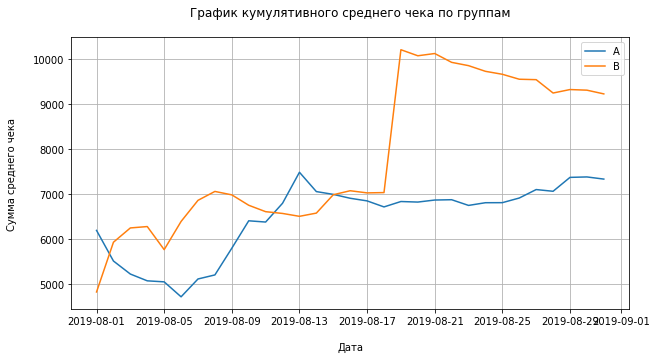

In [18]:
# построим графики, разделим кумулятивную выручку на кумулятивное число заказов
plt.figure(figsize= (10,5))
plt.grid()
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека по группам\n  ')
plt.xlabel('\nДата')
plt.ylabel('Сумма среднего чека\n')
plt.legend();

**Вывод:** 
- В группе A средний чек к концу второй недели подрос и стабилизировался
- В группе B средний чек к концу второй недели сравнялся со средним чеком группы А, затем 2019-08-19 наблюдается всплеск и плавное снижение к концу теста. Есть выбросы, судя по всему, которые дали такую картину.

<span style="color:brown">Построим график относительного изменения кумулятивного среднего чека группы B к группе A.</span>

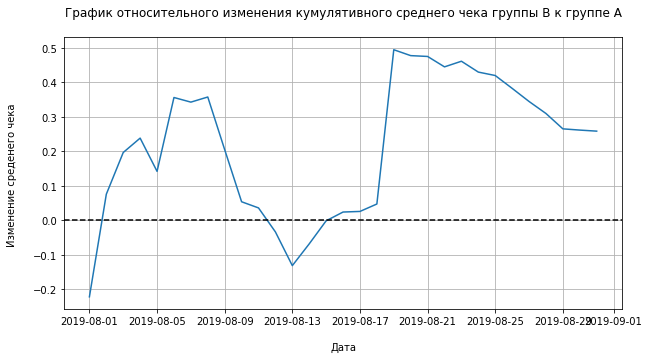

In [19]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue= cumulativeRevenueA.merge(cumulativeRevenueB, left_on= 'date', right_on= 'date', how= 'left', suffixes= ['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(10,5))
plt.grid()
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A\n  ')
plt.xlabel('\nДата')
plt.ylabel('Изменение среденего чека \n')
# добавляем ось X
plt.axhline(y= 0, color= 'black', linestyle= '--');

**Вывод:** И снова эта же дата 2019-08-19, здесь очень заметен скачок. Где-то уж точно спрятались крупные заказы и выбросы! Найдём их позже.

<span style="color:brown">Построим график кумулятивного среднего количества заказов на посетителя по группам.</span>

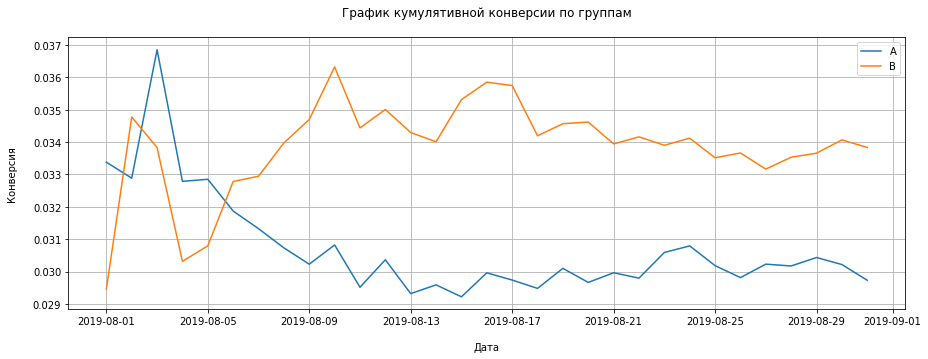

In [20]:
# считаем кумулятивную конверсию
cumulativeData['conversion']= cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA= cumulativeData[cumulativeData['group']== 'A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']== 'B']

# строим графики
plt.figure(figsize= (15,5))
plt.grid()
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label= 'A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label= 'B')
plt.legend()
plt.title('График кумулятивной конверсии по группам\n  ')
plt.xlabel('\nДата')
plt.ylabel('Конверсия\n');

**Вывод:** Визуально четко видно, что группы стартовали с разной конверсией, причем группа В на 8% по конверсии была меньше, но спустя неделю догнала группу А, и затем её конверсия стабилизировалась, и впоследствии опередила группу А почти на 5%. Конверсия группы А просела, и также стабилизировалась до конца теста.

<span style="color:brown">Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.</span>

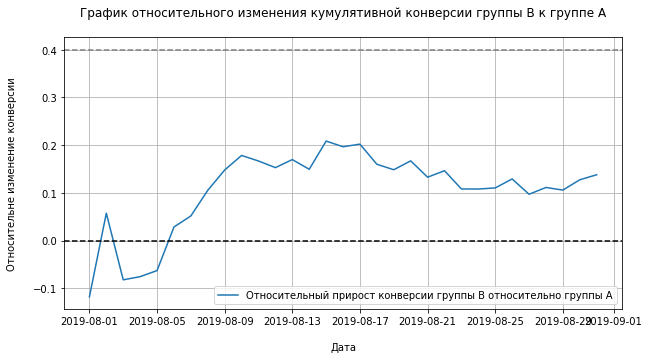

In [21]:
# построим график относительного различия кумулятивных конверсий:
mergedCumulativeConversions= cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on= 'date', right_on= 'date', how= 'left', suffixes= ['A', 'B'])
plt.figure(figsize= (10,5))
plt.grid()
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label= "Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y= 0, color= 'black', linestyle= '--')
plt.axhline(y= 0.4, color= 'grey', linestyle= '--')
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A\n  ')
plt.xlabel('\nДата')
plt.ylabel('Относительне изменение конверсии\n');

**Вывод:**  К середине второй недели эксперимаента отношение конверсий стабилизировалось, но группа A проигрывает группе B, практически на протяжении всего времени.

<span style="color:brown">Построим точечный график количества заказов по пользователям.</span> 

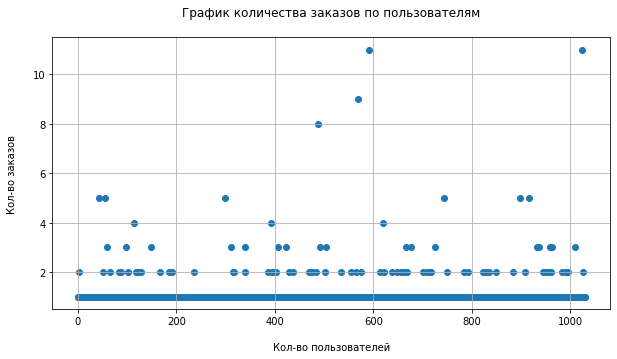

In [22]:
ordersByUsers= orders.drop(['group', 'revenue', 'date'], axis =1).groupby('visitorId', as_index= False). \
                       agg({'transactionId' : pd.Series.nunique})

ordersByUsers.columns= ['user_id','orders']

ordersByUsers.sort_values(by= 'orders',ascending= False).head(10)

# серия из чисел от 0 до количества наблюдений в ordersByUsers
plt.figure(figsize= (10,5))
plt.grid()
plt.title('График количества заказов по пользователям\n  ')
plt.xlabel('\nКол-во пользователей')
plt.ylabel('Кол-во заказов\n')
x_values= pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']);

**Вывод:** Абсолютное большинство пользователей сделали по 1-ому заказу, совсем небольшая часть от 2-ух до 3-ёх заказов , и единичные заказы от 4-ёх до 11-ти. Это выбросы, с ними нужно поработать, поэтому посчитаем выборочные перцентили.

<span style="color:brown">Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.</span>

In [23]:
# найдем перцентили с помощью метода np.percentile('column', [percentile1, percentile2]) 
print(np.percentile(ordersByUsers['orders'], [90, 95, 96, 97, 98, 99])) 

[1. 2. 2. 2. 3. 4.]


**Вывод:** Теперь видно, что большинство (98%) пользователей делают 1 или 2 заказа. Всё что выше - это аномалии.


<span style="color:brown">Построим точечный график стоимостей заказов </span>

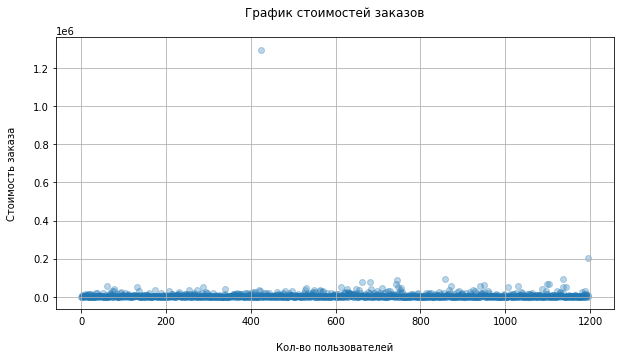

In [24]:
x_values= pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize= (10,5))
plt.grid()
plt.title('График стоимостей заказов\n ')
plt.xlabel('\nКол-во пользователей')
plt.ylabel('Стоимость заказа\n')
plt.scatter(x_values, orders['revenue'], alpha= 0.3);

**Вывод:** График не информативен из-за двух больших аномалий. Исключим выбросы с 'revenue' большим 200000.

In [25]:
# посмотрим на точные суммы аномальных заказов
orders['revenue'].sort_values().tail()

744       86620
1136      92550
858       93940
1196     202740
425     1294500
Name: revenue, dtype: int64

Выявлено 2 аномально высоких заказа: 202 740 и 1 294 500. Уберем их.

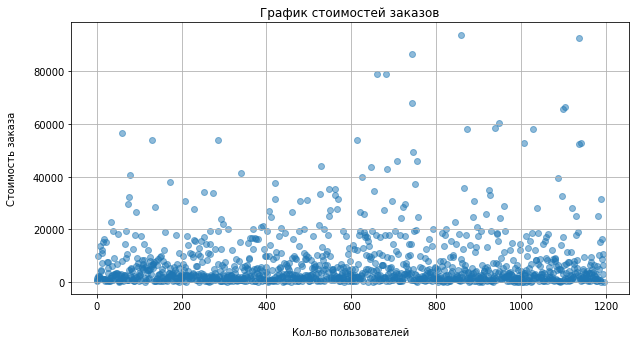

In [26]:
normal_orders = orders[orders['revenue']<=200000]['revenue']
xn_values = pd.Series(range(0,len(normal_orders)))
plt.figure(figsize=(10,5))
plt.grid()
plt.title('График стоимостей заказов')
plt.xlabel('\nКол-во пользователей')
plt.ylabel('Стоимость заказа\n')
plt.scatter(xn_values, normal_orders, alpha=0.5);

**Вывод:** Из графика видно, что большинство заказов не дороже 20 000. Но все равно определить границы сложно. Поэтому, поступим как и в случае с аномальными заказами, рассчитаем перцентили.

<span style="color:brown">Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.</span>

In [27]:
np.percentile(orders['revenue'], [95, 96, 97, 98, 99])

array([28000. , 31382. , 35485. , 44133.2, 58233.2])

**Вывод:** 99% заказов меньше суммы 58233.2 , установим её в качестве границы для аномалий.

<span style="color:brown">Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.</span>

Соберем все данные по заказам и визитам, добавим кумулятивные показатели в одну таблицу. 

In [28]:
# сначала создадим несколько таблиц
visitorsADaily= visitors[visitors['group']== 'A'][['date', 'visitors']]
visitorsADaily.columns= ['date', 'visitorsPerDateA']

visitorsACummulative= visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date']<= x['date']]. \
                                       agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis= 1)
visitorsACummulative.columns= ['date', 'visitorsCummulativeA']

visitorsBDaily= visitors[visitors['group']== 'B'][['date', 'visitors']]
visitorsBDaily.columns= ['date', 'visitorsPerDateB']

visitorsBCummulative= visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date']<= x['date']]. \
                                       agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis= 1)
visitorsBCummulative.columns= ['date', 'visitorsCummulativeB']

In [29]:
ordersADaily= orders[orders['group']== 'A'][['date', 'transactionId', 'visitorId', 'revenue']]\
               .groupby('date', as_index= False)\
               .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns= ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative= ordersADaily.apply(
    lambda x: \
                ordersADaily[ordersADaily['date']<= x['date']]\
                .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis= 1).sort_values(by= ['date'])
ordersACummulative.columns= ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily= orders[orders['group']== 'B'][['date', 'transactionId', 'visitorId', 'revenue']]\
              .groupby('date', as_index= False)\
              .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns= ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative= ordersBDaily.apply(
    lambda x: \
              ordersBDaily[ordersBDaily['date']<= x['date']]\
              .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis= 1).sort_values(by= ['date'])
ordersBCummulative.columns= ['date', 'ordersCummulativeB', 'revenueCummulativeB']

In [30]:
# теперь объединим всё в одну таблицу
data= ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
data.head(3)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803


Получилась новая таблица **data** со следующими данными:

- **date** — дата;
- **ordersPerDateA** — количество заказов в выбранную дату в группе A;
- **revenuePerDateA** — суммарная выручка в выбранную дату в группе A;
- **ordersPerDateB** — количество заказов в выбранную дату в группе B;
- **revenuePerDateB** — суммарная выручка в выбранную дату в группе B;
- **ordersCummulativeA** — суммарное число заказов до выбранной даты включительно в группе A;
- **revenueCummulativeA** — суммарная выручка до выбранной даты включительно в группе A;
- **ordersCummulativeB** — суммарное количество заказов до выбранной даты включительно в группе B;
- **revenueCummulativeB** — суммарная выручка до выбранной даты включительно в группе B;
- **visitorsPerDateA** — количество пользователей в выбранную дату в группе A;
- **visitorsPerDateB** — количество пользователей в выбранную дату в группе B;
- **visitorsCummulativeA** — количество пользователей до выбранной даты включительно в группе A;
- **visitorsCummulativeB** — количество пользователей до выбранной даты включительно в группе B.

- Создадим переменные **ordersByUsersA** и **ordersByUsersB** со столбцами ['userId', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 

In [31]:
ordersByUsersA= orders[orders['group']== 'A'].groupby('visitorId', as_index= False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB= orders[orders['group']== 'B'].groupby('visitorId', as_index= False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns= ['userId', 'orders']

- Объявим переменные **sampleA** и **sampleB**, в которых пользователям из разных групп будет соответствовать количество заказов.
Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни

In [32]:
sampleA= pd.concat(
    [ordersByUsersA['orders'],pd.Series(0, index= np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), \
                                        name= 'orders')], axis= 0)

sampleB= pd.concat(
    [ordersByUsersB['orders'],pd.Series(0, index= np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), \
                                        name ='orders')], axis= 0)

**Гипотеза H0:** Статистически значимых различий в среднем количестве заказов между группами А и В нет.

**Гипотеза Н1:** Статистически значимые различия есть.

In [33]:
# применим критерий и отформатируем p-value, округлив его до трёх знаков после запятой
alpha= .05 # критический уровень статистической значимости

results= st.mannwhitneyu(sampleA, sampleB)
print('p-значение: ', "{0:.3f}".format(results.pvalue))

if (results.pvalue< alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя")

print("Относительный показатель 'B' и 'A' = {0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

p-значение:  0.017
Отвергаем нулевую гипотезу: разница статистически значима
Относительный показатель 'B' и 'A' = 0.138


**Вывод:** P-value значительно меньше 0.05. Это означает, что по «сырым» данным в конверсии между группами A и B есть статистически значимое различие. Конверсия группы B относительно группы А выше на 14%.

<span style="color:brown">Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.</span>

**Гипотеза H0:** Статистически значимых различий в среднем чеке между группами нет.

**Гипотеза Н1:** Статистически значимые различия есть.

In [34]:
results= st.mannwhitneyu(orders[orders['group']== 'A']['revenue'], orders[orders['group']== 'B']['revenue'])

print('p-значение: ', "{0:.3f}".format(results.pvalue))

if (results.pvalue< alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя")

print("Относительный прирост в среднем чеке группы B: {0:.3f}".format(orders[orders['group']== 'B']['revenue'].mean()/orders[orders['group']== 'A']['revenue'].mean()-1))

p-значение:  0.729
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
Относительный прирост в среднем чеке группы B: 0.259


**Вывод:** P-value значительно больше 0.05. Это означает, что по «сырым» данным различий в среднем чеке заказа между группами A и B нет. Средний чек группы B на 26% выше среднего чека группы A, что не является статистически значимым различием.

<span style="color:brown">Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.</span>

Мы ранее сделали все расчеты и определились с аномальными пользователями. Вот они:

- совершили 3 и больше заказов
- совершили заказ дороже 58233.2 (округлим до 59000) рублей

Сделаем срезы пользователей:

- с числом заказов больше 2 — **usersWithManyOrders**
- сделавших заказы дороже 59000 — **usersWithExpensiveOrders**

Объединим их в одну таблицу **abnormalUsers**

In [35]:
# посчитаем статистическую значимость различия конверсии после удаления аномальных пользователей
usersWithManyOrders= pd.concat([ordersByUsersA[ordersByUsersA['orders']> 2]['userId'], ordersByUsersB[ordersByUsersB['orders']> 2]['userId']], axis= 0)
usersWithExpensiveOrders= orders[orders['revenue']> 59000]['visitorId']
abnormalUsers= pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis= 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print("Всего аномальных пользователей:" ,len(abnormalUsers)) 

1099    148427295
18      199603092
23      237748145
37      249864742
68      457167155
dtype: int64
Всего аномальных пользователей: 30


**Вывод:** Всего 30 аномальных пользователей. Посчитаем статистическую значимость различий в конверсии между группами теста по «очищенным» данным. 

In [36]:
# подготовим выборки количества заказов по пользователям по группам теста
sampleAFiltered= pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'], 
pd.Series(0, index= np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name= 'orders')],axis= 0)

sampleBFiltered= pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],
pd.Series(0, index= np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name= 'orders')],axis= 0) 

**Гипотеза H0:** Статистически значимых различий в конверсиях между группами нет.

**Гипотеза Н1:** Статистически значимые различия есть.

In [37]:
# применим статистический критерий Манна-Уитни к полученным выборкам
results= st.mannwhitneyu(sampleAFiltered, sampleBFiltered)

print('p-значение:', "{0:.3f}".format(results.pvalue))

if (results.pvalue< alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя")

print("Относительный показатель 'B' и 'A' = {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-значение: 0.009
Отвергаем нулевую гипотезу: разница статистически значима
Относительный показатель 'B' и 'A' = 0.176


**Вывод:** Р-value на порядок меньше 0.05. Это означает, что нулевую гипотезу отвергаем. По «очищенным» данным в конверсии групп A и B есть статистически значимые различия. В группе B, по-прежнему, результаты конверсии выше, чем в группе А, практически, на 18%.

<span style="color:brown">Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.</span>

**Гипотеза H0:** Статистически значимых различий в среднем чеке между группами нет.

**Гипотеза Н1:** Статистически значимые различия есть.

In [38]:
# выведем p-value для сравнения средних чеков между очищенными группами
results= st.mannwhitneyu(
         orders[np.logical_and(
         orders['group']== 'A',
         np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
         orders[np.logical_and(
         orders['group']== 'B',
         np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])

print('p-значение: ', "{0:.3f}".format(results.pvalue))

if (results.pvalue< alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя")

print("Относительный показатель 'B' и 'A' = {0:.3f}".format(
        orders[np.logical_and(orders['group']== 'B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
        orders[np.logical_and(
        orders['group']== 'A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

p-значение:  0.835
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
Относительный показатель 'B' и 'A' = -0.006


**Вывод:** P-value значительно больше 0.05. Между сегментами сократилась дистанция, с 26% и, можно сказать, до нуля, средний чек в группе B стал незначительно, но ниже, чем в группе A. Но статистически значимого различия по среднему чеку между группами ни по «сырым» данным, ни по «очищенным» нет. 

### ПРИНЯТИЕ РЕШЕНИЯ

Анализируя результаты **A/B-тестирования** мы пришли к следующим выводам:

- Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий,   у группы "В" конверсия выше на 18% по "очищенным" данным и на 14% по "сырым" относительно группы "А".
 
- По сырым и очищенным данным нет статистически значимого различия по среднему чеку между группами.
 
- График различия конверсий между группами показал, что результаты группы "B" лучше группы "A": имеют тенденцию к росту, либо зафиксировались около среднего значения.

- График различия среднего чека до избавления от аномалий колеблется: именно благодаря ему мы нашли выбросы. Сначала результаты группы "B" становятся лучше группы "A". Но после "чистки" данных, средний чек, практически, не изменился, а  стал немного меньше , чем в группе "A".

**Рекомендация:** 

1. Тест остановить.
2. Зафиксировать победу группы "В" по показателю конверсии. 
3. Отделу маркетинга продумать мероприятия по увеличению среднего чека.